# Lab | Random Forests

#Instructions

Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.

Use Feature Selections that you have learned in class to decide if you want to use all of the features 
(Variance Threshold, RFE, PCA, etc.)

Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.

Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to 
the cost of the false negative? How would you change your algorithm or data in order to maximize the return 
of the business?

In [1]:
# importing the needed datasets
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
#opening my files
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()# data is clearly imbalanced

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [3]:
# Checking the shape of my dataframe
data.shape

(95412, 339)

In [4]:
#checking for null values
data.isna().sum().sum()

0

In [5]:
# having a look in my dataframe columns
data.columns

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR', 'MAXRDATE_MM',
       'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR', 'FIRSTDATE_MM',
       'TARGET_B', 'TARGET_D'],
      dtype='object', length=339)

In [6]:
# checking the shape of my numerical dataframe
numerical.shape

(95412, 315)

In [7]:
# checking the shape of my categorical dataframe
categorical.shape

(95412, 22)

In [8]:
# X, y split
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76329, 338)
(19083, 338)
(76329,)
(19083,)


In [10]:
# Splitting data in categorical and numerical
numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

In [11]:
from sklearn.preprocessing import OneHotEncoder
#categoricalX_train encoding
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
#categoricalX_test encoding
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

In [12]:
from sklearn.preprocessing import MinMaxScaler
#numericalX_train scaling
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
#numericalX_test scaling
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

In [13]:
#Concatenating both dataframes for train and test post scalling and onehotencoding
X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)

In [14]:
# Check my data
display(X_train_treated.head())
display(y_train)

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0  0.000017  0.762887  0.500000  0.666667  0.008299  0.000000  0.313131   
1  0.000000  0.536082  0.666667  1.000000  0.000000  0.000000  0.292929   
2  0.000017  0.608247  0.666667  0.111111  0.020747  0.000000  0.424242   
3  0.000017  0.783505  0.833333  0.666667  0.037344  0.010101  0.404040   
4  0.000052  0.556701  0.666667  0.222222  0.087137  0.333333  0.272727   

   VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0  0.101010  0.686869  0.060606  0.121212  0.034483  1.000000  0.007153   
1  0.242424  0.383838  0.070707  0.080808  0.045977  1.000000  0.045856   
2  0.161616  0.626263  0.101010  0.020202  0.011494  0.111111  0.067304   
3  0.232323  0.414141  0.080808  0.030303  0.045977  0.666667  0.014063   
4  0.292929  0.181818  0.121212  0.020202  0.080460  1.000000  0.010040   

     POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0  0.009129  0.007683  1.000000      0.0  0.000000  0.474747  0.535354   
1  0.055403  0.044968  0.000000      0.0  1.000000  0.494949  0.515152   
2  0.091154  0.087309  1.000000      0.0  0.000000  0.454545  0.555556   
3  0.017853  0.013728  1.000000      0.0  0.000000  0.494949  0.515152   
4  0.012052  0.010988  0.939394      0.0  0.070707  0.505051  0.505051   

       ETH1      ETH2      ETH3      ETH4      ETH5  ETH6      ETH7      ETH8  \
0  0.757576  0.212121  0.000000  0.020202  0.020202   0.0  0.000000  0.000000   
1  0.757576  0.161616  0.090909  0.000000  0.010101   0.0  0.000000  0.000000   
2  0.989899  0.000000  0.000000  0.010101  0.020202   0.0  0.000000  0.000000   
3  0.787879  0.010101  0.010101  0.151515  0.111111   0.0  0.013889  0.050505   
4  0.888889  0.080808  0.000000  0.030303  0.040404   0.0  0.000000  0.000000   

       ETH9     ETH10     ETH11     ETH12     ETH13     ETH14  ETH15  \
0  0.000000  0.000000  0.021277  0.000000  0.000000  0.017544    0.0   
1  0.000000  0.000000  0.000000  0.000000  0.010309  0.000000    0.0   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.017544    0.0   
3  0.089552  0.021739  0.021277  0.013889  0.072165  0.017544    0.0   
4  0.014925  0.021739  0.000000  0.000000  0.020619  0.017544    0.0   

      ETH16    AGE901    AGE902    AGE903    AGE904    AGE905    AGE906  \
0  0.023256  0.404762  0.500000  0.547619  0.428571  0.535714  0.583333   
1  0.000000  0.416667  0.559524  0.607143  0.452381  0.583333  0.630952   
2  0.011628  0.595238  0.702381  0.738095  0.559524  0.642857  0.678571   
3  0.034884  0.476190  0.583333  0.630952  0.476190  0.571429  0.619048   
4  0.011628  0.309524  0.380952  0.416667  0.321429  0.428571  0.476190   

     AGE907     CHIL1     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
0  0.333333  0.363636  0.474747  0.171717  0.131313  0.212121  0.191919   
1  0.373333  0.393939  0.404040  0.202020  0.111111  0.181818  0.161616   
2  0.200000  0.505051  0.353535  0.151515  0.101010  0.161616  0.111111   
3  0.280000  0.343434  0.444444  0.232323  0.101010  0.161616  0.171717   
4  0.400000  0.545455  0.343434  0.121212  0.202020  0.383838  0.161616   

      AGEC4     AGEC5     AGEC6     AGEC7    CHILC1    CHILC2    CHILC3  \
0  0.131313  0.151515  0.121212  0.060606  0.141414  0.141414  0.353535   
1  0.151515  0.141414  0.121212  0.141414  0.141414  0.181818  0.343434   
2  0.080808  0.151515  0.252525  0.151515  0.232323  0.191919  0.303030   
3  0.141414  0.222222  0.141414  0.060606  0.151515  0.131313  0.353535   
4  0.131313  0.080808  0.040404  0.010101  0.222222  0.242424  0.343434   

     CHILC4    CHILC5    HHAGE1    HHAGE2    HHAGE3      HHN1      HHN2  \
0  0.212121  0.161616  0.282828  0.090909  0.252525  0.212121  0.383838   
1  0.191919  0.151515  0.353535  0.141414  0.323232  0.212121  0.333333   
2  0.151515  0.131313  0.464646  0.141414  0.444444  0.292929  0.494949   
3  0.212121  0.161616  0.343434  0.080808  0.292929  0.151515  0.383838   
4  0.131313

79401    0
86429    0
76729    1
38838    0
83012    0
        ..
21243    0
45891    0
42613    1
43567    0
68268    0
Name: TARGET_B, Length: 76329, dtype: int64

In [15]:
#Checking my data
X_train.head()
X_test.head()

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
58053     28  65.000000       6        9    0         0       24        42   
9484       1  58.000000       5        9    0         0       17        28   
13395      1  46.000000       7        8    1         0       28        44   
1466       0  61.611649       5        9    0         0       33        37   
2076       0  46.000000       3        2    0        49       16        32   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
58053        22         9         2       1        9   10575    3049    4490   
9484         42        10         3       6        3     659     152     192   
13395        22         2         4       0        8    1031     269     306   
1466         49         8         8       4        2    2540     732     821   
2076          3         9         1      41        9   12367    2589    2826   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
58053       98        0        2       47       53    90     2     1     4   
9484        99        0        0       44       56     5    95     0     0   
13395       99        0        0       49       51    93     0     0     4   
1466        99        0        0       51       49    99     0     0     1   
2076        99        0        0       62       38    74    17     1     5   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
58053     9     0     1     1     1      0      0      0      5      0      1   
9484      1     0     0     0     0      0      0      0      0      0      0   
13395     9     0     1     0     1      1      0      1      6      0      0   
1466      0     0     0     0     0      0      0      0      0      0      0   
2076     14     0     1     0     2      1      0      0      7      1      4   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
58053      2      35      42      45      39      47      50      20     47   
9484       1      34      44      49      36      46      51      27     35   
13395      4      30      39      41      31      40      43      30     36   
1466       0      33      42      45      33      43      46      30     30   
2076       2      26      30      33      24      32      35      31     53   

       CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  \
58053     36     17      9     25     19     12     11     13     12      22   
9484      36     28     17     14     19     16     15     10      9      13   
13395     37     27     14     23     30     19      7      5      2      18   
1466      45     25     12     18     24     23     14      6      3      13   
2076      36     11     19     46     26      5      2      1      0      23   

       CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  \
58053      18      31      17      12      33      15      31    26    40   
9484       13      30      20      24      17       3      15    18    23   
13395      12      28      22      20      12       2       9     8    25   
1466       12      33      24      18      13       3      12     9    30   
2076       22      34      14       7       1       0       0     7    23   

       HHN3  HHN4  HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  \
58053    33    18     6     2     63     10      9     18   159   235   65   
9484     58    37    18    10     31     15      9     45   239   311   91   
13395    67    46    19     8     62      9      3     27   282   335   99   
1466     61    38    15     4     70      6      3     21   247   309   94   
2076     70    47    17     5     66      9      1     24   285   333   89   

       DW2  DW3  DW4  DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  \
58053   34    1   27   26   12    0    0    0  1953  2155    8    8   87   13   
9484    88    6    8    2    0    9    9    0   254

In [16]:
#Checking my data = target
y_test

58053    0
9484     0
13395    0
1466     0
2076     0
        ..
94255    0
26449    0
1969     0
48574    0
73270    0
Name: TARGET_B, Length: 19083, dtype: int64

In [17]:
# Applying my Model -  RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated, y_train)
print(clf.score(X_train_treated, y_train))
print(clf.score(X_test_treated, y_test))

y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


TARGET_B
0    18083
1     1000
Name: count, dtype: int64

array([[18083,     0],
       [ 1000,     0]], dtype=int64)

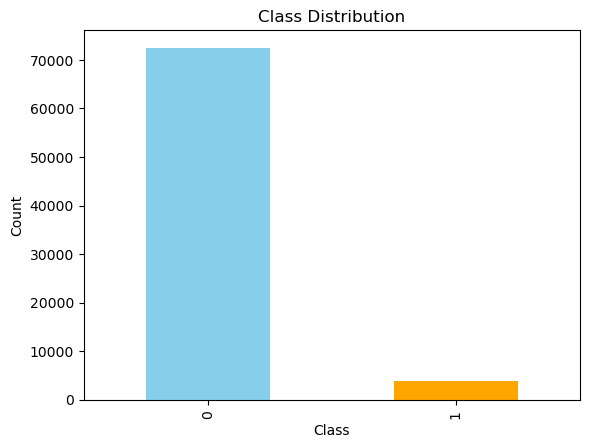

Class Distribution:
TARGET_B
0    72486
1     3843
Name: count, dtype: int64


In [18]:
# Checking for imbalanced data
import matplotlib.pyplot as plt
import pandas as pd

# Plotting class distribution
y_train.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Printing class distribution
print("Class Distribution:")
print(y_train.value_counts())

In [19]:
# Upsample category 1 to match the length of category 0
# need to reset_index on y_train to make sure they line up
trainset = pd.concat([X_train_treated, y_train.reset_index(drop=True)], axis=1)
category_1_upsampled = trainset[trainset['TARGET_B'] == 1].sample(len(trainset[trainset['TARGET_B'] == 0]), replace=True)
print(category_1_upsampled.shape)
category_0 = trainset[trainset['TARGET_B'] == 0]
print(category_0.shape)
# Concatenate the upsampled category 1 with category 0
trainset_new_upsampled = pd.concat([category_0, category_1_upsampled], axis=0)
trainset_new_upsampled = trainset_new_upsampled.sample(frac=1)  # randomize the rows
X_train_treated_upsampled = trainset_new_upsampled.drop(['TARGET_B'], axis=1)
y_train_upsampled = trainset_new_upsampled['TARGET_B']
print(X_train_treated_upsampled.shape)

(72486, 356)
(72486, 356)
(144972, 355)


In [20]:
print(X_train_treated_upsampled.shape)

(144972, 355)


In [21]:
# Now we can remove the column target d from the set of features
# reverting back to the name X_train
X_train_treated_upsampled = X_train_treated_upsampled.drop(['TARGET_D'], axis = 1).copy()
X_test_treated  = X_test_treated.drop(['TARGET_D'], axis = 1)


In [22]:
# Re-running my model after upsampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated_upsampled, y_train_upsampled)
print(clf.score(X_train_treated_upsampled, y_train_upsampled))
print(clf.score(X_test_treated, y_test))
y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6203059901222305
0.6028402242833936


TARGET_B
0    18083
1     1000
Name: count, dtype: int64

array([[10962,  7121],
       [  458,   542]], dtype=int64)

In [23]:
'''Analysis:
1. Before Upsampling:
Accuracy: The model achieved high accuracy, but this can be misleading in imbalanced datasets, as it 
predominantly predicts the majority class.
Confusion Matrix: The model predicted all instances as the majority class (0), resulting in no true positive 
predictions for the minority class (1).

2. After Upsampling:
Accuracy Drop: After upsampling, the accuracy dropped significantly, reflecting a more realistic performance 
assessment.
Improvement in Minority Class Prediction: The model now predicts some instances of the minority class (1), 
as evident from the non-zero values in the true positives and false negatives.

In conclusion, there are several things I can do to improve my model, but the most important is the feature
selection using my initial numerical dataframe.'''

'Analysis:\n1. Before Upsampling:\nAccuracy: The model achieved high accuracy, but this can be misleading in imbalanced datasets, as it \npredominantly predicts the majority class.\nConfusion Matrix: The model predicted all instances as the majority class (0), resulting in no true positive \npredictions for the minority class (1).\n\n2. After Upsampling:\nAccuracy Drop: After upsampling, the accuracy dropped significantly, reflecting a more realistic performance \nassessment.\nImprovement in Minority Class Prediction: The model now predicts some instances of the minority class (1), \nas evident from the non-zero values in the true positives and false negatives.\n\nIn conclusion, there are several things I can do to improve my model, but the most important is the feature\nselection using my initial numerical dataframe.'

# Feature Selection

In [24]:
#scalling y numerical dataframe
from sklearn.preprocessing import MinMaxScaler
#numerical scaling
transformer = MinMaxScaler().fit(numerical)
numerical_scaled = transformer.transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)
#Check my scaled numerical
numerical_scaled

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000000  0.608247  0.666667  1.000000  0.000000  0.000000  0.393939   
1      0.000014  0.463918  0.833333  1.000000  0.066390  0.000000  0.151515   
2      0.000014  0.624862  0.333333  0.111111  0.008299  0.000000  0.202020   
3      0.000000  0.711340  0.000000  0.444444  0.008299  0.000000  0.232323   
4      0.000000  0.793814  0.333333  0.222222  0.248963  0.010101  0.282828   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000014  0.624862  0.666667  1.000000  0.000000  0.141414  0.363636   
95408  0.000014  0.484536  1.000000  1.000000  0.004149  0.000000  0.313131   
95409  0.000014  0.608247  0.666667  1.000000  0.000000  0.000000  0.181818   
95410  0.000000  0.587629  1.000000  1.000000  0.000000  0.000000  0.282828   
95411  0.000028  0.814433  0.666667  0.888889  0.012448  0.010101  0.333333   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.343434  0.181818  0.101010  0.020202  0.011494  0.555556  0.010051   
1      0.555556  0.111111  0.060606  0.020202  0.011494  1.000000  0.036585   
2      0.292929  0.333333  0.060606  0.080808  0.011494  0.111111  0.070931   
3      0.141414  0.313131  0.030303  0.000000  0.034483  0.000000  0.006484   
4      0.090909  0.535354  0.262626  0.030303  0.022989  1.000000  0.025532   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.474747  0.111111  0.070707  0.080808  0.149425  1.000000  0.277403   
95408  0.434343  0.191919  0.040404  0.010101  0.000000  1.000000  0.012705   
95409  0.464646  0.202020  0.070707  0.232323  0.000000  1.000000  0.005593   
95410  0.353535  0.202020  0.090909  0.010101  0.011494  0.777778  0.017690   
95411  0.222222  0.272727  0.080808  0.101010  0.034483  0.888889  0.039868   

         POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.011108  0.009378  0.000000  0.353535  0.656566  0.474747  0.535354   
1      0.039552  0.028190  1.000000  0.000000  0.000000  0.505051  0.505051   
2      0.085837  0.075389  0.000000  0.020202  0.989899  0.494949  0.515152   
3      0.006732  0.006186  0.000000  0.080808  0.929293  0.545455  0.464646   
4      0.026382  0.021495  1.000000  0.000000  0.000000  0.464646  0.545455   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.305142  0.283507  1.000000  0.000000  0.000000  0.505051  0.505051   
95408  0.013549  0.010197  0.969697  0.000000  0.040404  0.515152  0.494949   
95409  0.005512  0.005790  1.000000  0.000000  0.000000  0.535354  0.474747   
95410  0.018177  0.014349  1.000000  0.000000  0.000000  0.474747  0.535354   
95411  0.050156  0.037906  1.000000  0.000000  0.000000  0.484848  0.525253   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.929293  0.010101  0.000000  0.000000  0.111111  0.000000  0.000000   
1      0.676768  0.000000  0.000000  0.313131  0.060606  0.181818  0.027778   
2      0.969697  0.020202  0.000000  0.000000  0.020202  0.000000  0.000000   
3      0.616162  0.000000  0.000000  0.111111  0.323232  0.272727  0.027778   
4      0.020202  0.989899  0.000000  0.000000  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.787879  0.101010  0.060606  0.040404  0.050505  0.000000  0.000000   
95408  0.919192  0.030303  0.000000  0.020202  0.060606  0.045455  0.000000   
95409  0.828283  0.141414  0.000000  0.010101  0.090909  0.000000  0.000000   
95410  0.929293  0.010101  0.010101  0.050505  0.080808  0.000000  0.013889   
95411  0.868687  0.121212  0.000000  0.010101  0.010101  0.000000  0.000000   

           ETH8      ETH9     ETH10  ETH11  ETH12     ETH13     ETH14  \
0      0.000000  0.000000  0.000000    0.0    0.0  0.113402  0.000000   
1      0.060606  0.059701  0.304348    0.0    0.0  0.020619  0.00000

In [25]:
X = numerical_scaled
y = targets['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=50).fit_transform(X, y)
# Here we choose 50 best features
selected = pd.DataFrame(kbest)
selected.head()

0         1         2         3         4         5         6   \
0  0.666667  0.010101  0.079833  0.105833  0.230769  0.153846  0.070707   
1  0.833333  0.000000  0.911333  0.869667  0.923077  0.769231  0.090909   
2  0.333333  0.020202  0.082833  0.091000  0.153846  0.076923  0.181818   
3  0.000000  0.000000  0.166667  0.210500  0.153846  0.076923  0.060606   
4  0.333333  0.989899  0.096000  0.099000  0.307692  0.230769  0.000000   

         7         8         9         10        11        12        13  \
0  0.000000  0.000000  0.000000  0.020202  0.070707  0.131313  0.272727   
1  0.000000  0.000000  0.000000  0.979798  0.989899  0.989899  0.989899   
2  0.000000  0.010101  0.000000  0.000000  0.010101  0.060606  0.181818   
3  0.000000  0.000000  0.000000  0.101010  0.252525  0.505051  0.696970   
4  0.381818  0.585859  0.191919  0.000000  0.010101  0.020202  0.161616   

         14        15        16        17        18        19        20  \
0  0.474747  0.000000  0.020202  0.050505  0.171717  0.000000  0.212000   
1  1.000000  0.949495  0.919192  0.919192  0.919192  0.478632  0.730667   
2  0.505051  0.000000  0.000000  0.020202  0.090909  0.000000  0.194667   
3  0.929293  0.101010  0.010101  0.080808  0.171717  0.997863  0.258667   
4  0.676768  0.000000  0.252525  0.585859  0.747475  0.534188  0.166667   

         21        22        23        24        25    26        27        28  \
0  0.252000  0.131313  0.010101  0.010101  0.040404  0.00  0.020202  0.515152   
1  0.691333  0.020202  0.141414  0.333333  0.020202  0.28  0.323232  0.666667   
2  0.226667  0.323232  0.020202  0.010101  0.202020  0.00  0.010101  0.313131   
3  0.282000  0.272727  0.050505  0.040404  0.353535  0.00  0.050505  0.262626   
4  0.214000  0.242424  0.040404  0.020202  0.212121  0.00  0.030303  0.111111   

         29        30        31        32        33        34        35  \
0  0.010101  0.000000  0.000000  0.161616  0.040404  0.030303  0.161616   
1  0.030303  0.000000  0.000000  0.050505  0.303030  0.202020  0.000000   
2  0.111111  0.000000  0.000000  0.222222  0.050505  0.030303  0.080808   
3  0.202020  0.000000  0.000000  0.282828  0.030303  0.050505  0.161616   
4  0.141414  0.010101  0.010101  0.161616  0.121212  0.050505  0.202020   

         36        37        38        39        40   41        42        43  \
0  0.747475  0.141414  0.313131  0.545455  0.464646  0.0  0.285714  0.433333   
1  0.393939  0.565657  0.979798  1.000000  0.000000  0.0  0.952381  0.183333   
2  0.848485  0.232323  0.505051  0.696970  0.313131  0.0  0.428571  0.416667   
3  0.676768  0.191919  0.393939  0.454545  0.555556  0.0  0.761905  0.433333   
4  0.656566  0.030303  0.060606  0.333333  0.676768  0.0  0.285714  0.700000   

         44        45        46        47        48        49  
0  0.366492  0.127119  0.341463  0.498045  1.000000  0.622951  
1  0.146597  0.008475  0.024390  0.774510  0.333333  0.000000  
2  0.308901  0.110169  0.341463  0.078617  1.000000  0.967213  
3  0.324607  0.063559  0.170732  0.899764  1.000000  0.655738  
4  0.570681  0.152542  0.195122  0.037079  0.333333  0.409836

In [26]:
# To check the scores
model = SelectKBest(chi2, k=50).fit(X, y)
# Create a DataFrame with scores and column names
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical_scaled.columns
cols = df.sort_values(by = ['score'], ascending = False).head(50)['Column']
cols

313      RFA_2F
305    CARDGIFT
110        HVP1
111        HVP2
112        HVP3
115        HVP6
113        HVP4
22         ETH2
129         RP1
130         RP2
304    NGIFTALL
83          HV1
84          HV2
108       ETHC5
107       ETHC4
299    CARDPROM
300     NUMPROM
131         RP3
114        HVP5
314    CLUSTER2
2        INCOME
86          HV4
85          HV3
150        IC15
133         MSA
158        IC23
311    CONTROLN
162       HHAS4
161       HHAS3
279         HC6
266       POBC2
149        IC14
295       MHUC1
281         HC8
233         EC7
156        IC21
137         IC2
141         IC6
91          HU5
168        TPE3
139         IC4
228         EC2
234         EC8
109       ETHC6
249         VC4
278         HC5
169        TPE4
146        IC11
280         HC7
282         HC9
Name: Column, dtype: object

In [27]:
# Check multicollinearity
numerical_data = pd.concat([numerical_scaled[cols], targets['TARGET_B']], axis=1)
corr = numerical_data.corr()
corr
best_corr= corr.sort_values(by = 'TARGET_B', ascending=False)
best_corr_list = best_corr['TARGET_B']
best_corr_list

TARGET_B    1.000000
RFA_2F      0.072311
CARDGIFT    0.054027
NGIFTALL    0.050896
NUMPROM     0.033161
CARDPROM    0.032467
HV2         0.025607
HV1         0.025012
HVP4        0.024186
HVP3        0.024175
HVP2        0.023514
HVP1        0.022948
HVP5        0.022034
IC4         0.020535
HHAS3       0.020252
HV3         0.020191
HV4         0.020085
RP2         0.019928
HVP6        0.019869
IC2         0.019828
RP1         0.019158
MHUC1       0.018195
RP3         0.017939
EC7         0.017818
IC11        0.016961
INCOME      0.016508
EC8         0.016443
IC14        0.014884
IC23        0.014821
IC21        0.013339
CONTROLN    0.013165
MSA         0.011018
HC6         0.010803
HC7         0.010363
HC9         0.008515
HC5         0.008399
HU5         0.007898
HC8        -0.009124
TPE3       -0.012178
TPE4       -0.012396
VC4        -0.013304
ETHC6      -0.013369
IC6        -0.014362
EC2        -0.015423
CLUSTER2   -0.016390
IC15       -0.017081
HHAS4      -0.017448
POBC2      -0

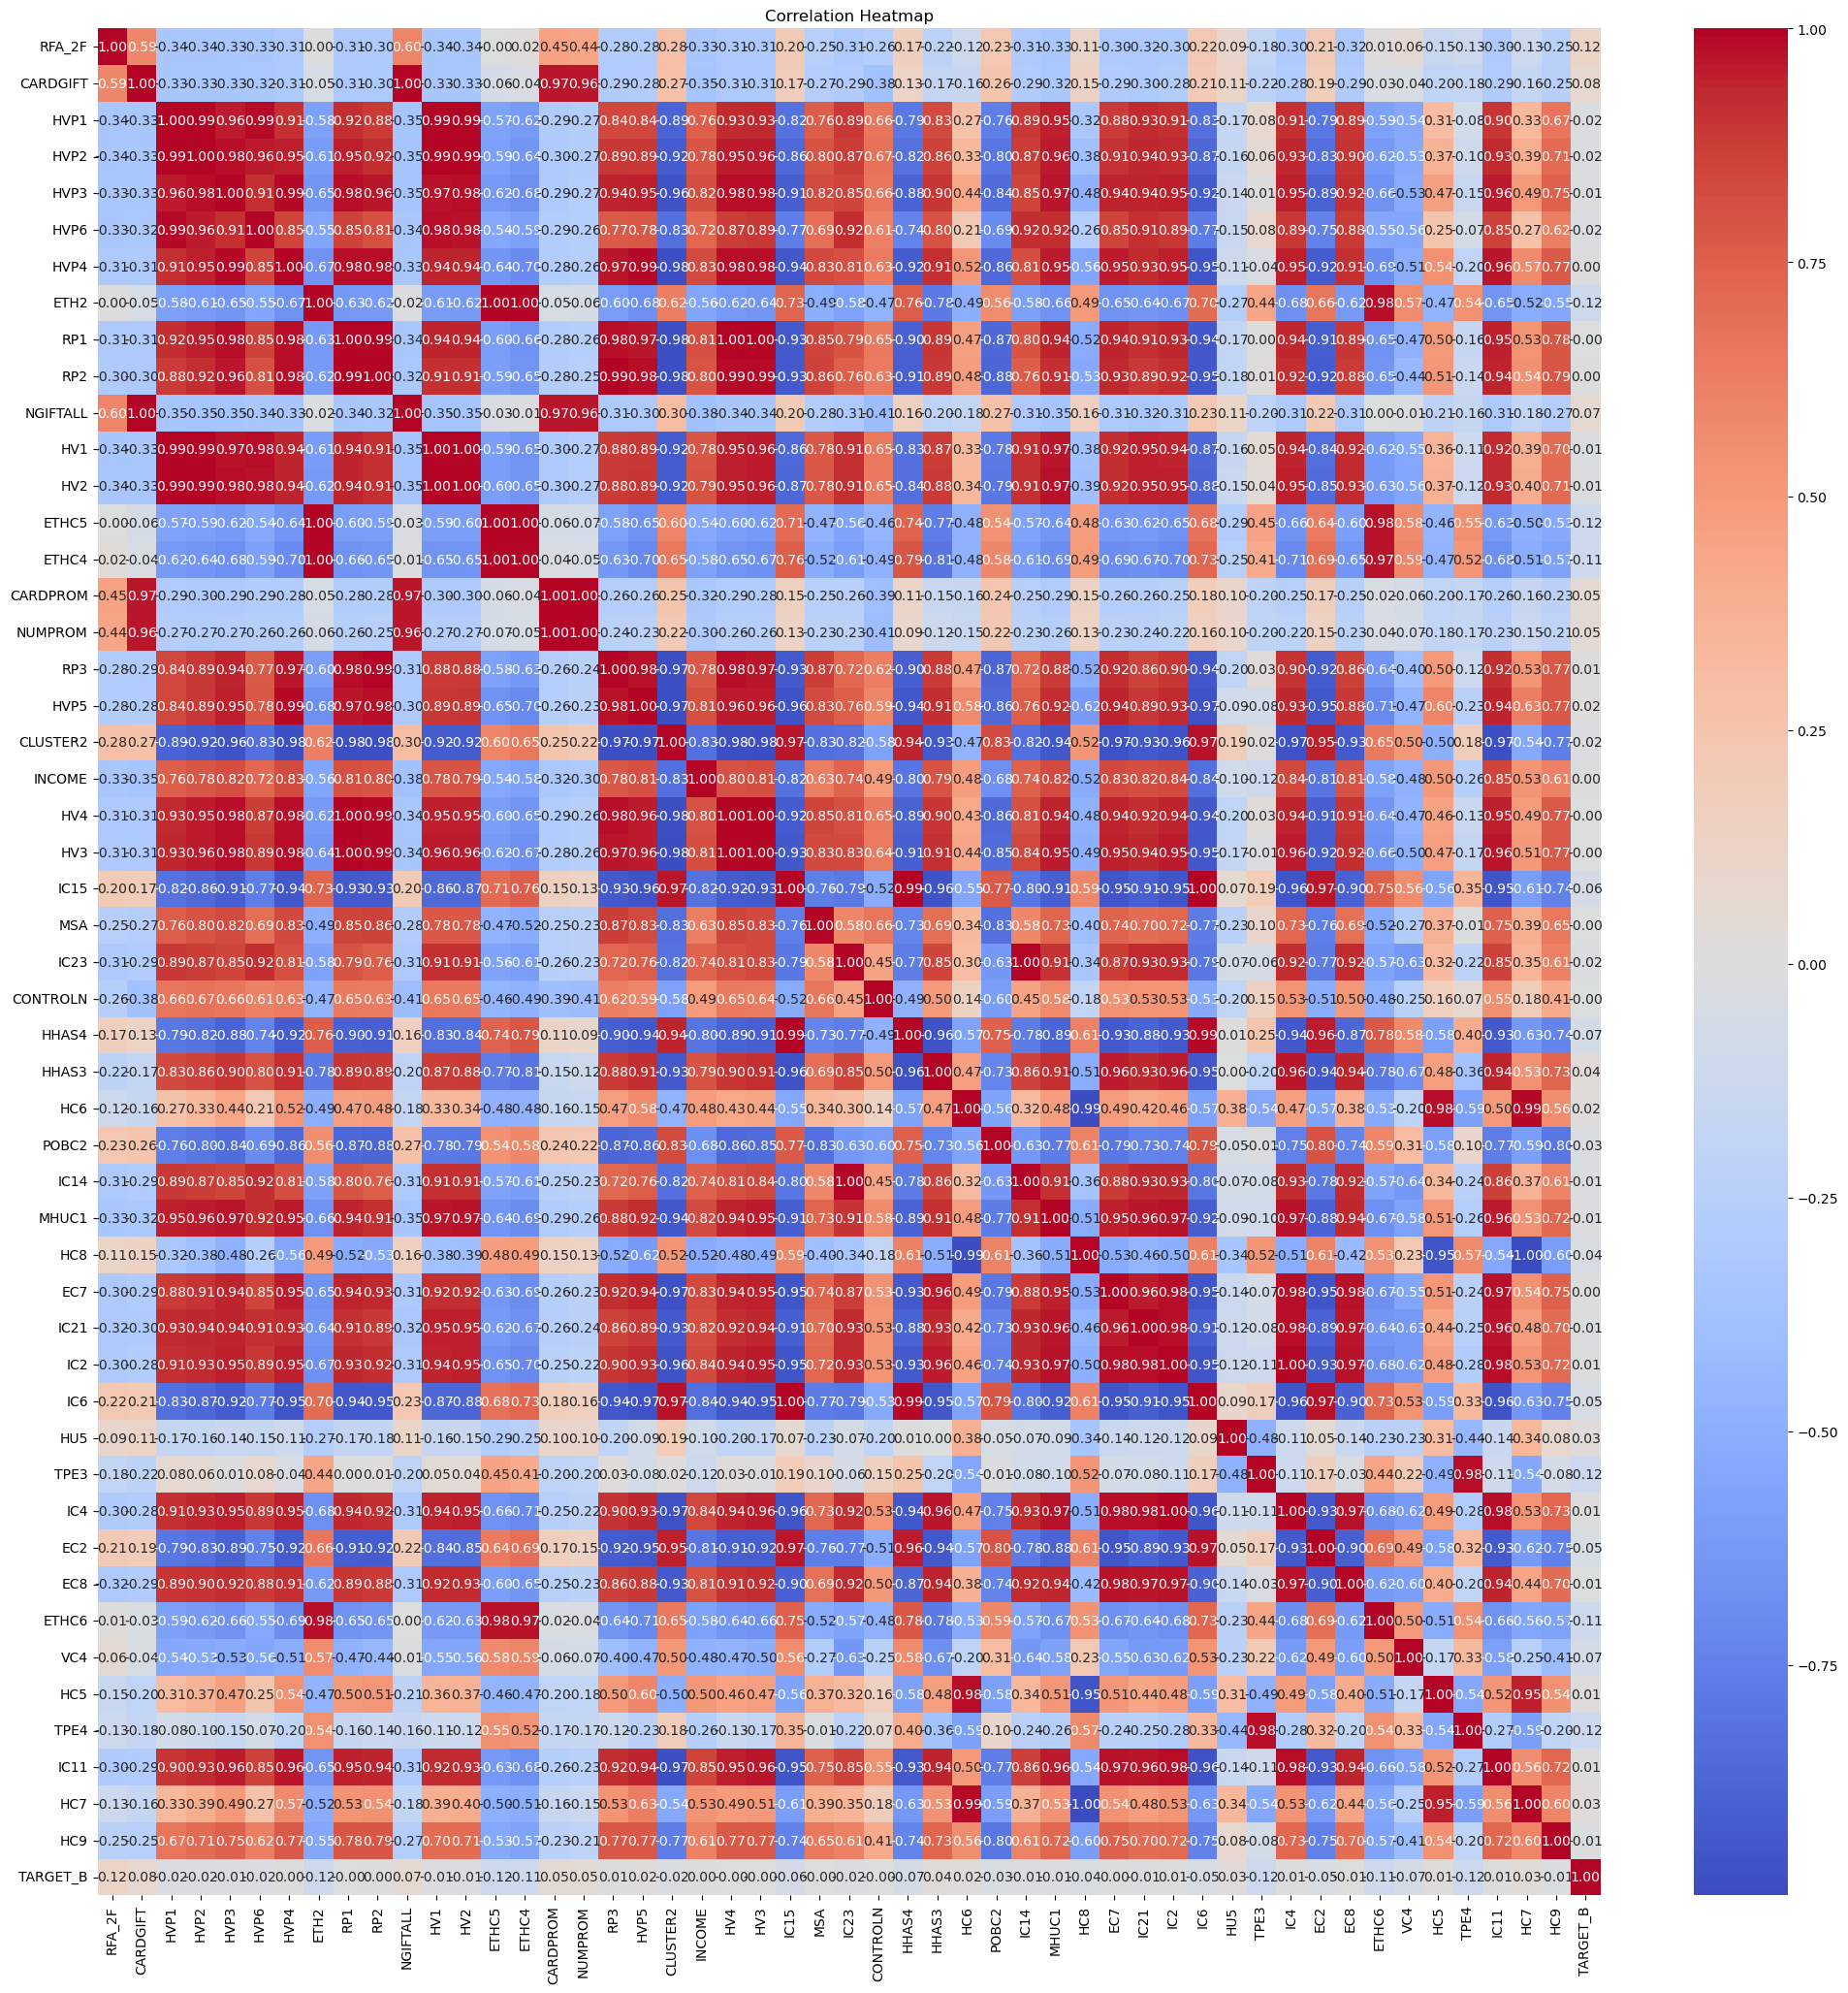

In [28]:
# Plot the top features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
correlation_matrix = best_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
# From the best correlation list to the TARGET filtering just the ones with highest values and do not have repeated prefix

best_corr_list = {
    'COLUMN': ['TARGET_B', 'RFA_2F', 'CARDGIFT', 'NGIFTALL', 'NUMPROM', 'CARDPROM', 'HV2', 'HV1', 'HVP4', 'HVP3', 'HVP2', 'HVP1', 'HVP5', 'IC4', 'HHAS3', 'HV3', 'HV4', 'RP2', 'HVP6', 'IC2', 'RP1', 'MHUC1', 'RP3', 'EC7', 'IC11', 'INCOME', 'EC8', 'IC14', 'IC23', 'IC21', 'CONTROLN', 'MSA', 'HC6', 'HC7', 'HC9', 'HC5', 'HU5', 'HC8', 'TPE3', 'TPE4', 'VC4', 'ETHC6', 'IC6', 'EC2', 'CLUSTER2', 'IC15', 'HHAS4', 'POBC2', 'ETHC5', 'ETH2', 'ETHC4'],
    'SCORE': [1.000000, 0.072311, 0.054027, 0.050896, 0.033161, 0.032467, 0.025607, 0.025012, 0.024186, 0.024175, 0.023514, 0.022948, 0.022034, 0.020535, 0.020252, 0.020191, 0.020085, 0.019928, 0.019869, 0.019828, 0.019158, 0.018195, 0.017939, 0.017818, 0.016961, 0.016508, 0.016443, 0.014884, 0.014821, 0.013339, 0.013165, 0.011018, 0.010803, 0.010363, 0.008515, 0.008399, 0.007898, -0.009124, -0.012178, -0.012396, -0.013304, -0.013369, -0.014362, -0.015423, -0.016390, -0.017081, -0.017448, -0.017562, -0.018689, -0.019040, -0.019885]
}

df1 = pd.DataFrame(best_corr_list)
# Extract prefixes before the numeric part
df1['Prefix'] = df1['COLUMN'].str.extract(r'([a-zA-Z]+)')
# Create an empty dictionary to store selected columns
selected_columns = {}
# Iterate through the DataFrame
for index, row in df1.iterrows():
    column = row['COLUMN']
    prefix = row['Prefix']
    value = row['SCORE']
        # Check if the prefix is already in the selected columns dictionary
    if prefix not in selected_columns:
        selected_columns[prefix] = {'COLUMN': column, 'SCORE': value}
    else:
        # Compare values and keep the column with the higher value
        if value > selected_columns[prefix]['SCORE']:
            selected_columns[prefix] = {'COLUMN': column, 'SCORE': value}

# Create a new DataFrame with the selected columns
cols_to_keep = pd.DataFrame(list(selected_columns.values()))
# Display the result
cols_to_keep

COLUMN     SCORE
0   TARGET_B  1.000000
1     RFA_2F  0.072311
2   CARDGIFT  0.054027
3   NGIFTALL  0.050896
4    NUMPROM  0.033161
5   CARDPROM  0.032467
6        HV2  0.025607
7       HVP4  0.024186
8        IC4  0.020535
9      HHAS3  0.020252
10       RP2  0.019928
11     MHUC1  0.018195
12       EC7  0.017818
13    INCOME  0.016508
14  CONTROLN  0.013165
15       MSA  0.011018
16       HC6  0.010803
17       HU5  0.007898
18      TPE3 -0.012178
19       VC4 -0.013304
20     ETHC6 -0.013369
21  CLUSTER2 -0.016390
22     POBC2 -0.017562
23      ETH2 -0.019040

In [30]:
# From my original numerical drop all columns except the 'cols_to_keep'
columns_to_keep = cols_to_keep['COLUMN'].tolist()
numerical_selected = numerical_scaled.drop(numerical.columns.difference(columns_to_keep), axis=1)
numerical_selected

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
0      0.666667  0.010101  0.105833  0.070707  0.000000  0.272727  0.050505   
1      0.833333  0.000000  0.869667  0.090909  0.000000  0.989899  0.919192   
2      0.333333  0.020202  0.091000  0.181818  0.000000  0.181818  0.020202   
3      0.000000  0.000000  0.210500  0.060606  0.000000  0.696970  0.080808   
4      0.333333  0.989899  0.099000  0.000000  0.191919  0.161616  0.585859   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.666667  0.101010  0.170833  0.030303  0.000000  0.737374  0.848485   
95408  1.000000  0.030303  0.287167  0.000000  0.000000  0.919192  0.262626   
95409  0.666667  0.141414  0.062833  0.101010  0.010101  0.010101  0.343434   
95410  1.000000  0.010101  0.409833  0.000000  0.000000  1.000000  0.888889   
95411  0.666667  0.121212  0.174833  0.101010  0.010101  0.757576  0.656566   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
0      0.000000  0.252000  0.515152  0.000000  0.040404  0.161616  0.747475   
1      0.478632  0.691333  0.666667  0.000000  0.303030  0.000000  0.393939   
2      0.000000  0.226667  0.313131  0.000000  0.050505  0.080808  0.848485   
3      0.997863  0.282000  0.262626  0.000000  0.030303  0.161616  0.676768   
4      0.534188  0.214000  0.111111  0.010101  0.121212  0.202020  0.656566   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.040598  0.356667  0.707071  0.020202  0.151515  0.252525  0.262626   
95408  0.358974  0.566000  0.616162  0.040404  0.363636  0.151515  0.515152   
95409  0.431624  0.230000  0.262626  0.000000  0.111111  0.202020  0.828283   
95410  0.933226  0.370667  0.464646  0.000000  0.151515  0.080808  0.505051   
95411  0.982906  0.346000  0.545455  0.010101  0.282828  0.151515  0.484848   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
0      0.313131  0.285714  0.433333  0.366492  0.127119  0.341463  0.498045   
1      0.979798  0.952381  0.183333  0.146597  0.008475  0.024390  0.774510   
2      0.505051  0.428571  0.416667  0.308901  0.110169  0.341463  0.078617   
3      0.393939  0.761905  0.433333  0.324607  0.063559  0.170732  0.899764   
4      0.060606  0.285714  0.700000  0.570681  0.152542  0.195122  0.037079   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.787879  0.761905  0.083333  0.052356  0.000000  0.000000  0.962399   
95408  0.949495  0.857143  0.050000  0.031414  0.000000  0.000000  0.639828   
95409  0.000000  0.238095  0.216667  0.151832  0.025424  0.097561  0.988852   
95410  0.171717  0.571429  0.583333  0.643979  0.169492  0.439024  0.024466   
95411  0.868687  0.380952  0.516667  0.706806  0.161017  0.268293  0.965246   

         RFA_2F  CLUSTER2  
0      1.000000  0.622951  
1      0.333333  0.000000  
2      1.000000  0.967213  
3      1.000000  0.655738  
4      0.333333  0.409836  
...         ...       ...  
95407  0.000000  0.180328  
95408  0.000000  0.016393  
95409  0.666667  0.540984  
95410  1.000000  0.163934  
95411  0.000000  0.180328  

[95412 rows x 23 columns]

In [31]:
print(numerical_selected.shape)
print(categorical.shape)

(95412, 23)
(95412, 22)


In [32]:
#getting my numerical features selection, categorical and targets concatenated
new_data_feature_selected = pd.concat([numerical_selected, categorical, targets['TARGET_B']], axis=1).reset_index(drop=True)
new_data_feature_selected

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
0      0.666667  0.010101  0.105833  0.070707  0.000000  0.272727  0.050505   
1      0.833333  0.000000  0.869667  0.090909  0.000000  0.989899  0.919192   
2      0.333333  0.020202  0.091000  0.181818  0.000000  0.181818  0.020202   
3      0.000000  0.000000  0.210500  0.060606  0.000000  0.696970  0.080808   
4      0.333333  0.989899  0.099000  0.000000  0.191919  0.161616  0.585859   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.666667  0.101010  0.170833  0.030303  0.000000  0.737374  0.848485   
95408  1.000000  0.030303  0.287167  0.000000  0.000000  0.919192  0.262626   
95409  0.666667  0.141414  0.062833  0.101010  0.010101  0.010101  0.343434   
95410  1.000000  0.010101  0.409833  0.000000  0.000000  1.000000  0.888889   
95411  0.666667  0.121212  0.174833  0.101010  0.010101  0.757576  0.656566   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
0      0.000000  0.252000  0.515152  0.000000  0.040404  0.161616  0.747475   
1      0.478632  0.691333  0.666667  0.000000  0.303030  0.000000  0.393939   
2      0.000000  0.226667  0.313131  0.000000  0.050505  0.080808  0.848485   
3      0.997863  0.282000  0.262626  0.000000  0.030303  0.161616  0.676768   
4      0.534188  0.214000  0.111111  0.010101  0.121212  0.202020  0.656566   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.040598  0.356667  0.707071  0.020202  0.151515  0.252525  0.262626   
95408  0.358974  0.566000  0.616162  0.040404  0.363636  0.151515  0.515152   
95409  0.431624  0.230000  0.262626  0.000000  0.111111  0.202020  0.828283   
95410  0.933226  0.370667  0.464646  0.000000  0.151515  0.080808  0.505051   
95411  0.982906  0.346000  0.545455  0.010101  0.282828  0.151515  0.484848   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
0      0.313131  0.285714  0.433333  0.366492  0.127119  0.341463  0.498045   
1      0.979798  0.952381  0.183333  0.146597  0.008475  0.024390  0.774510   
2      0.505051  0.428571  0.416667  0.308901  0.110169  0.341463  0.078617   
3      0.393939  0.761905  0.433333  0.324607  0.063559  0.170732  0.899764   
4      0.060606  0.285714  0.700000  0.570681  0.152542  0.195122  0.037079   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.787879  0.761905  0.083333  0.052356  0.000000  0.000000  0.962399   
95408  0.949495  0.857143  0.050000  0.031414  0.000000  0.000000  0.639828   
95409  0.000000  0.238095  0.216667  0.151832  0.025424  0.097561  0.988852   
95410  0.171717  0.571429  0.583333  0.643979  0.169492  0.439024  0.024466   
95411  0.868687  0.380952  0.516667  0.706806  0.161017  0.268293  0.965246   

         RFA_2F  CLUSTER2  STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R  \
0      1.000000  0.622951     IL       36        H      F         3      L   
1      0.333333  0.000000     CA       14        H      M         3      L   
2      1.000000  0.967213     NC       43        U      M         3      L   
3      1.000000  0.655738     CA       44        U      F         3      L   
4      0.333333  0.409836     FL       16        H      F         3      L   
...         ...       ...    ...      ...      ...    ...       ...    ...   
95407  0.000000  0.180328  other       27        H      M         3      L   
95408  0.000000  0.016393     TX       24        H      M         3      L   
95409  0.666667  0.540984     MI       30        H      M         3      L   
95410  1.000000  0.163934     CA       24        H      F         2      L   
95411  0.000000  0.180328     NC       24        U      F         3      L   

      RFA_2A GEOCODE2 DOMAIN_A  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  \
0          E        C        T         2         89          1      37   
1          G        A        S         1         94          1      52   
2  

In [33]:
# X, y split using the new data with less numerical features
y_feature = new_data_feature_selected['TARGET_B']
X_feature = new_data_feature_selected.drop(['TARGET_B'], axis = 1)

In [34]:
#Checking the shape
X_feature.shape
y_feature.shape

(95412,)

In [35]:
# Getting my upsampled data (numerical features selected and scaled + categorical encoded) cooncatenated
new_train_data_oversampled=pd.concat([X_train_treated_upsampled[numerical_selected.columns],X_train_treated_upsampled[encoded_categorical_train.columns]], axis=1 )

In [36]:
# checking the shape
new_train_data_oversampled.shape

(144972, 47)

In [37]:
# Getting my test data (numerical features selected and scaled + categorical encoded) cooncatenated
X_test_2 = pd.concat([X_test_treated[numerical_selected.columns], X_test_treated[encoded_categorical_test.columns]], axis=1)
X_test_2

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
0      0.833333  0.020202  0.359167  0.020202  0.000000  0.949495  0.909091   
1      0.666667  0.959596  0.044333  0.000000  0.185185  0.010101  0.101010   
2      1.000000  0.000000  0.386500  0.000000  0.000000  0.989899  0.979798   
3      0.666667  0.000000  0.178500  0.000000  0.000000  0.747475  0.575758   
4      0.333333  0.171717  0.061833  0.000000  0.000000  0.070707  0.191919   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.166667  0.000000  0.088333  0.171717  0.000000  0.151515  0.111111   
19079  0.666667  0.020202  0.107333  0.222222  0.000000  0.373737  0.040404   
19080  0.666667  0.101010  0.070333  0.090909  0.024691  0.131313  0.010101   
19081  0.166667  0.010101  0.094333  0.010101  0.000000  0.202020  0.010101   
19082  0.833333  0.000000  0.140333  0.474747  0.000000  0.464646  0.494949   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
0      0.478632  0.376000  0.525253  0.010101  0.171717  0.080808  0.474747   
1      0.230769  0.218667  0.121212  0.030303  0.050505  0.000000  0.656566   
2      0.933226  0.397333  0.545455  0.020202  0.101010  0.151515  0.505051   
3      0.752137  0.366667  0.636364  0.000000  0.171717  0.080808  0.666667   
4      0.799145  0.201333  0.494949  0.010101  0.111111  0.535354  0.232323   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000000  0.253333  0.505051  0.000000  0.040404  0.151515  0.565657   
19079  0.386752  0.307333  0.646465  0.000000  0.141414  0.000000  0.828283   
19080  0.000000  0.200667  0.232323  0.000000  0.040404  0.070707  0.595960   
19081  0.000000  0.216000  0.292929  0.000000  0.080808  0.070707  0.808081   
19082  0.000000  0.338667  0.676768  0.020202  0.202020  0.000000  0.696970   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
0      0.656566  0.619048  0.350000  0.256545  0.029661  0.121951  0.776898   
1      0.060606  0.238095  0.483333  0.335079  0.059322  0.243902  0.355786   
2      0.414141  0.523810  0.366667  0.282723  0.029661  0.121951  0.829647   
3      0.666667  0.428571  0.466667  0.329843  0.080508  0.292683  0.160853   
4      0.838384  0.000000  0.083333  0.052356  0.000000  0.024390  0.836081   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.464646  0.285714  0.216667  0.167539  0.021186  0.000000  0.323640   
19079  0.353535  0.333333  0.333333  0.261780  0.021186  0.073171  0.412560   
19080  0.494949  0.285714  0.083333  0.057592  0.000000  0.000000  0.254852   
19081  0.242424  0.380952  0.516667  0.356021  0.110169  0.390244  0.250811   
19082  0.717172  0.333333  0.450000  0.340314  0.055085  0.268293  0.442767   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
0      0.000000  0.163934       0.0       0.0       0.0       0.0       0.0   
1      0.000000  0.475410       0.0       0.0       0.0       0.0       1.0   
2      0.000000  0.065574       0.0       0.0       0.0       0.0       0.0   
3      0.333333  0.065574       0.0       0.0       0.0       0.0       0.0   
4      0.000000  0.639344       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.666667  0.967213       0.0       0.0       0.0       1.0       0.0   
19079  0.333333  0.163934       0.0       0.0       0.0       0.0       0.0   
19080  0.000000  0.967213       0.0       0.0       0.0       0.0       0.0   
19081  0.000000  0.885246       0.0       0.0       0.0       0.0       0.0   
19082  0.333333  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
0           0.0       0.0       0.0       0.0       0.0          0.0   
1           0.0       0.0       0.0       0.0       0.0          0.0 

In [38]:
# checking the shape of my y_train upsampled to see if matches to be able to use it in training my model
y_train_upsampled.shape

(144972,)

In [39]:
# Training my model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(new_train_data_oversampled, y_train_upsampled)
print(clf.score(new_train_data_oversampled, y_train_upsampled))
print(clf.score(X_test_2, y_test))
y_pred = clf.predict(X_test_2)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6030060977292167
0.5678352460304984


TARGET_B
0    18083
1     1000
Name: count, dtype: int64

array([[10261,  7822],
       [  425,   575]], dtype=int64)

In [40]:
'''While the trainning set got an accuracy of 0,61 , he accuracy on the test set is approximately 56.2%. This indicates the proportion of correctly predicted instances out
of the total instances in the test set. 
True Negative (TN): 10,131 instances were correctly predicted as Class 0.
False Positive (FP): 7,952 instances were incorrectly predicted as Class 1.
False Negative (FN): 414 instances were incorrectly predicted as Class 0.
True Positive (TP): 586 instances were correctly predicted as Class 1.
By reading these results I can say that there was room for improvement in this model. But deffinitely better results
than the first one.'''

'While the trainning set got an accuracy of 0,61 , he accuracy on the test set is approximately 56.2%. This indicates the proportion of correctly predicted instances out\nof the total instances in the test set. \nTrue Negative (TN): 10,131 instances were correctly predicted as Class 0.\nFalse Positive (FP): 7,952 instances were incorrectly predicted as Class 1.\nFalse Negative (FN): 414 instances were incorrectly predicted as Class 0.\nTrue Positive (TP): 586 instances were correctly predicted as Class 1.\nBy reading these results I can say that there was room for improvement in this model. But deffinitely better results\nthan the first one.'

In [41]:
#dropping duplicates from my upsampled train data
new_train_data_oversampled_1 = new_train_data_oversampled.drop_duplicates(keep='last')
new_train_data_oversampled_1

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
8742   0.333333  0.090909  0.110500  0.181818  0.012346  0.343434  0.171717   
76082  0.166667  0.020202  0.049667  0.000000  0.000000  0.000000  0.030303   
68360  0.333333  0.080808  0.055333  0.000000  0.000000  0.010101  0.646465   
56065  0.666667  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24984  0.166667  0.010101  0.087500  0.000000  0.000000  0.111111  0.171717   
...         ...       ...       ...       ...       ...       ...       ...   
33435  0.666667  0.000000  0.118333  0.202020  0.000000  0.313131  0.111111   
21277  0.666667  0.060606  0.143333  0.000000  0.024691  0.404040  0.464646   
24009  0.666667  0.111111  0.132167  0.000000  0.012346  0.404040  0.252525   
34455  0.666667  0.040404  0.139500  0.000000  0.000000  0.616162  0.212121   
53393  0.666667  0.000000  0.099667  0.040404  0.000000  0.171717  0.060606   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
8742   0.068376  0.240667  0.323232  0.000000  0.101010  0.151515  0.707071   
76082  0.371795  0.172000  0.242424  0.030303  0.000000  0.131313  0.787879   
68360  0.230769  0.210000  0.212121  0.000000  0.000000  0.242424  0.787879   
56065  0.440171  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24984  0.319979  0.229333  0.525253  0.000000  0.131313  0.181818  0.535354   
...         ...       ...       ...       ...       ...       ...       ...   
33435  0.282051  0.315333  0.434343  0.000000  0.060606  0.090909  0.868687   
21277  0.089744  0.364667  0.666667  0.000000  0.363636  0.181818  0.616162   
24009  0.000000  0.274000  0.676768  0.000000  0.191919  0.000000  0.696970   
34455  0.397436  0.378000  0.555556  0.000000  0.181818  0.030303  0.777778   
53393  0.653846  0.284000  0.494949  0.000000  0.141414  0.111111  0.808081   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
8742   0.858586  0.380952  0.383333  0.272251  0.063559  0.219512  0.629186   
76082  0.000000  0.190476  0.100000  0.052356  0.000000  0.024390  0.312179   
68360  0.000000  0.190476  0.400000  0.293194  0.021186  0.121951  0.360777   
56065  0.000000  0.000000  0.400000  0.272251  0.029661  0.121951  0.739464   
24984  0.000000  0.238095  0.500000  0.335079  0.050847  0.219512  0.689813   
...         ...       ...       ...       ...       ...       ...       ...   
33435  0.565657  0.380952  0.400000  0.329843  0.055085  0.170732  0.363670   
21277  0.333333  0.285714  0.500000  0.392670  0.072034  0.268293  0.648135   
24009  0.030303  0.238095  0.483333  0.356021  0.063559  0.195122  0.973412   
34455  0.464646  0.380952  0.433333  0.324607  0.059322  0.146341  0.012045   
53393  0.353535  0.333333  0.366667  0.282723  0.025424  0.073171  0.503082   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
8742   0.000000  0.688525       0.0       0.0       0.0       0.0       0.0   
76082  0.000000  0.721311       0.0       0.0       0.0       1.0       0.0   
68360  0.000000  0.540984       0.0       0.0       0.0       0.0       1.0   
56065  0.000000  0.377049       0.0       0.0       0.0       0.0       0.0   
24984  0.000000  0.557377       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
33435  0.000000  0.655738       0.0       0.0       0.0       0.0       1.0   
21277  0.666667  0.163934       0.0       0.0       0.0       0.0       0.0   
24009  0.666667  0.590164       0.0       0.0       0.0       0.0       0.0   
34455  1.000000  0.229508       0.0       0.0       0.0       0.0       1.0   
53393  0.000000  0.344262       0.0       0.0       1.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
8742        0.0       0.0       1.0       0.0       0.0          0.0   
76082       0.0       0.0       0.0       0.0       0.0          0.0 

In [42]:
# Getting my final testing data all togetter
whole_data_treated = pd.concat([new_train_data_oversampled_1,X_test_2], axis =0)
whole_data_treated

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
8742   0.333333  0.090909  0.110500  0.181818  0.012346  0.343434  0.171717   
76082  0.166667  0.020202  0.049667  0.000000  0.000000  0.000000  0.030303   
68360  0.333333  0.080808  0.055333  0.000000  0.000000  0.010101  0.646465   
56065  0.666667  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24984  0.166667  0.010101  0.087500  0.000000  0.000000  0.111111  0.171717   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.166667  0.000000  0.088333  0.171717  0.000000  0.151515  0.111111   
19079  0.666667  0.020202  0.107333  0.222222  0.000000  0.373737  0.040404   
19080  0.666667  0.101010  0.070333  0.090909  0.024691  0.131313  0.010101   
19081  0.166667  0.010101  0.094333  0.010101  0.000000  0.202020  0.010101   
19082  0.833333  0.000000  0.140333  0.474747  0.000000  0.464646  0.494949   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
8742   0.068376  0.240667  0.323232  0.000000  0.101010  0.151515  0.707071   
76082  0.371795  0.172000  0.242424  0.030303  0.000000  0.131313  0.787879   
68360  0.230769  0.210000  0.212121  0.000000  0.000000  0.242424  0.787879   
56065  0.440171  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24984  0.319979  0.229333  0.525253  0.000000  0.131313  0.181818  0.535354   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000000  0.253333  0.505051  0.000000  0.040404  0.151515  0.565657   
19079  0.386752  0.307333  0.646465  0.000000  0.141414  0.000000  0.828283   
19080  0.000000  0.200667  0.232323  0.000000  0.040404  0.070707  0.595960   
19081  0.000000  0.216000  0.292929  0.000000  0.080808  0.070707  0.808081   
19082  0.000000  0.338667  0.676768  0.020202  0.202020  0.000000  0.696970   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
8742   0.858586  0.380952  0.383333  0.272251  0.063559  0.219512  0.629186   
76082  0.000000  0.190476  0.100000  0.052356  0.000000  0.024390  0.312179   
68360  0.000000  0.190476  0.400000  0.293194  0.021186  0.121951  0.360777   
56065  0.000000  0.000000  0.400000  0.272251  0.029661  0.121951  0.739464   
24984  0.000000  0.238095  0.500000  0.335079  0.050847  0.219512  0.689813   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.464646  0.285714  0.216667  0.167539  0.021186  0.000000  0.323640   
19079  0.353535  0.333333  0.333333  0.261780  0.021186  0.073171  0.412560   
19080  0.494949  0.285714  0.083333  0.057592  0.000000  0.000000  0.254852   
19081  0.242424  0.380952  0.516667  0.356021  0.110169  0.390244  0.250811   
19082  0.717172  0.333333  0.450000  0.340314  0.055085  0.268293  0.442767   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
8742   0.000000  0.688525       0.0       0.0       0.0       0.0       0.0   
76082  0.000000  0.721311       0.0       0.0       0.0       1.0       0.0   
68360  0.000000  0.540984       0.0       0.0       0.0       0.0       1.0   
56065  0.000000  0.377049       0.0       0.0       0.0       0.0       0.0   
24984  0.000000  0.557377       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.666667  0.967213       0.0       0.0       0.0       1.0       0.0   
19079  0.333333  0.163934       0.0       0.0       0.0       0.0       0.0   
19080  0.000000  0.967213       0.0       0.0       0.0       0.0       0.0   
19081  0.000000  0.885246       0.0       0.0       0.0       0.0       0.0   
19082  0.333333  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
8742        0.0       0.0       1.0       0.0       0.0          0.0   
76082       0.0       0.0       0.0       0.0       0.0          0.0 

In [43]:
# Check the predictions
y_pred = clf.predict(whole_data_treated)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [44]:
# Adding the prections column to my dataset
whole_data_treated['PREDICTIONS'] = y_pred

In [45]:
# Checking the results
whole_data_treated

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
8742   0.333333  0.090909  0.110500  0.181818  0.012346  0.343434  0.171717   
76082  0.166667  0.020202  0.049667  0.000000  0.000000  0.000000  0.030303   
68360  0.333333  0.080808  0.055333  0.000000  0.000000  0.010101  0.646465   
56065  0.666667  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24984  0.166667  0.010101  0.087500  0.000000  0.000000  0.111111  0.171717   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.166667  0.000000  0.088333  0.171717  0.000000  0.151515  0.111111   
19079  0.666667  0.020202  0.107333  0.222222  0.000000  0.373737  0.040404   
19080  0.666667  0.101010  0.070333  0.090909  0.024691  0.131313  0.010101   
19081  0.166667  0.010101  0.094333  0.010101  0.000000  0.202020  0.010101   
19082  0.833333  0.000000  0.140333  0.474747  0.000000  0.464646  0.494949   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
8742   0.068376  0.240667  0.323232  0.000000  0.101010  0.151515  0.707071   
76082  0.371795  0.172000  0.242424  0.030303  0.000000  0.131313  0.787879   
68360  0.230769  0.210000  0.212121  0.000000  0.000000  0.242424  0.787879   
56065  0.440171  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24984  0.319979  0.229333  0.525253  0.000000  0.131313  0.181818  0.535354   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000000  0.253333  0.505051  0.000000  0.040404  0.151515  0.565657   
19079  0.386752  0.307333  0.646465  0.000000  0.141414  0.000000  0.828283   
19080  0.000000  0.200667  0.232323  0.000000  0.040404  0.070707  0.595960   
19081  0.000000  0.216000  0.292929  0.000000  0.080808  0.070707  0.808081   
19082  0.000000  0.338667  0.676768  0.020202  0.202020  0.000000  0.696970   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
8742   0.858586  0.380952  0.383333  0.272251  0.063559  0.219512  0.629186   
76082  0.000000  0.190476  0.100000  0.052356  0.000000  0.024390  0.312179   
68360  0.000000  0.190476  0.400000  0.293194  0.021186  0.121951  0.360777   
56065  0.000000  0.000000  0.400000  0.272251  0.029661  0.121951  0.739464   
24984  0.000000  0.238095  0.500000  0.335079  0.050847  0.219512  0.689813   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.464646  0.285714  0.216667  0.167539  0.021186  0.000000  0.323640   
19079  0.353535  0.333333  0.333333  0.261780  0.021186  0.073171  0.412560   
19080  0.494949  0.285714  0.083333  0.057592  0.000000  0.000000  0.254852   
19081  0.242424  0.380952  0.516667  0.356021  0.110169  0.390244  0.250811   
19082  0.717172  0.333333  0.450000  0.340314  0.055085  0.268293  0.442767   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
8742   0.000000  0.688525       0.0       0.0       0.0       0.0       0.0   
76082  0.000000  0.721311       0.0       0.0       0.0       1.0       0.0   
68360  0.000000  0.540984       0.0       0.0       0.0       0.0       1.0   
56065  0.000000  0.377049       0.0       0.0       0.0       0.0       0.0   
24984  0.000000  0.557377       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.666667  0.967213       0.0       0.0       0.0       1.0       0.0   
19079  0.333333  0.163934       0.0       0.0       0.0       0.0       0.0   
19080  0.000000  0.967213       0.0       0.0       0.0       0.0       0.0   
19081  0.000000  0.885246       0.0       0.0       0.0       0.0       0.0   
19082  0.333333  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
8742        0.0       0.0       1.0       0.0       0.0          0.0   
76082       0.0       0.0       0.0       0.0       0.0          0.0 

In [46]:
#STEPS TO FOLLOW FOR THE SECOND PART :
# save it to the dataframe 
# get the predictions column to the main original dataset
# load all back from csv but select only were target B= 1
# feature selection first with TARGET B =1
# x/y split
# train/test split
# Splitting data in categorical and numerical
# scalling
# encoding
# concatenating
# run model trainig set
# load the last dataframe saved 'whole_data_treated'
# match the columns of both
# re run the model 
# and then predict again


In [47]:
# # Getting to use VarianceThreshold
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Step 1: Variance Threshold Feature Selection
# selector = VarianceThreshold(threshold=0.1)
# X_train_high_variance = selector.fit_transform(X_train)

# # Get selected features
# selected_features = X_train.columns[selector.get_support()]

# # Step 2: Train RandomForestClassifier on the selected features
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Step 3: Evaluate the model
# X_test_high_variance = X_test[selected_features]  # Apply the same feature selection to the test set

# y_train_pred = clf.predict(X_train_high_variance)
# y_test_pred = clf.predict(X_test_high_variance)

# print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))

# print("\nClassification Report:")
# print(classification_report(y_test, y_test_pred))

# # Step 4: Feature Importances
# feature_importances = clf.feature_importances_

# # Assuming selected_features contains the names of selected features
# feature_importance_dict = dict(zip(selected_features, feature_importances))

# # Print feature importances
# print("\nFeature Importances:")
# for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
#     print(f"{feature}: {importance}")


In [48]:
# # your code here
# corr = pokemon3.corr()
# corr
# #Dragon , Psychic
# pokemon_best = corr.sort_values(by = 'Total', ascending=False)

# pokemon_best['Total']